In [7]:
import pandas as pd
import os
import seaborn as sns
import warnings
import scipy as sp
import pingouin as pg
import statsmodels.api as sm
import matplotlib.pyplot as plt
# 指定文件夹路径
folder_path = './air_quality'

# 获取文件夹中的所有文件名
filenames = os.listdir(folder_path)

# 读取所有 CSV 文件
Air_Qualities = [pd.read_csv(os.path.join(folder_path, filename)) for filename in filenames if filename.endswith('.csv')]


In [8]:
Air_Qualities_of_Aotizhongxin = Air_Qualities['stationId' == 'Aotizhongxin'].copy()
Air_Qualities_of_Aotizhongxin.dropna(axis=0, how='any', inplace=True)

In [9]:
# 定义因变量和自变量

X = Air_Qualities_of_Aotizhongxin[['PM10', 'SO2','CO', 'NO2', 'O3']]
y = Air_Qualities_of_Aotizhongxin['PM2.5']

# 添加截距项
X = sm.add_constant(X)

# 进行多元线性回归
model = sm.OLS(y, X)
results = model.fit()

# 打印回归结果
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                 3.449e+04
Date:                Tue, 26 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:50:20   Log-Likelihood:            -1.5515e+05
No. Observations:               31815   AIC:                         3.103e+05
Df Residuals:                   31809   BIC:                         3.104e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.4499      0.504    -44.554      0.0

In [10]:
# 获取 R² 值
r_squared = results.rsquared
print(f"R-squared: {r_squared}")

# 获取调整 R² 值
r_squared_adj = results.rsquared_adj
print(f"Adjusted R-squared: {r_squared_adj}")

# 获取标准估计误差
standard_errors = results.bse
print(f"Standard Errors: {standard_errors}")

R-squared: 0.844276913435529
Adjusted R-squared: 0.8442524356011796
Standard Errors: const    0.503879
PM10     0.002933
SO2      0.009462
CO       0.000232
NO2      0.008079
O3       0.003743
dtype: float64


In [11]:
# 获取 F 统计量的值
f_value = results.fvalue
print(f"F-statistic: {f_value}")

# 获取 F 统计量的 p 值
f_pvalue = results.f_pvalue
print(f"P-value of F-statistic: {f_pvalue}")

F-statistic: 34491.487334284575
P-value of F-statistic: 0.0


In [12]:
# 获取 t 统计量的值
t_values = results.tvalues
print(f"T-statistics: {t_values}")

# 获取 t 统计量的 p 值
p_values = results.pvalues
print(f"P-values: {p_values}")

T-statistics: const    -44.554172
PM10     172.720013
SO2       -3.121376
CO        95.474639
NO2       31.204995
O3        32.565615
dtype: float64
P-values: const     0.000000e+00
PM10      0.000000e+00
SO2       1.801694e-03
CO        0.000000e+00
NO2      1.374713e-210
O3       7.290407e-229
dtype: float64


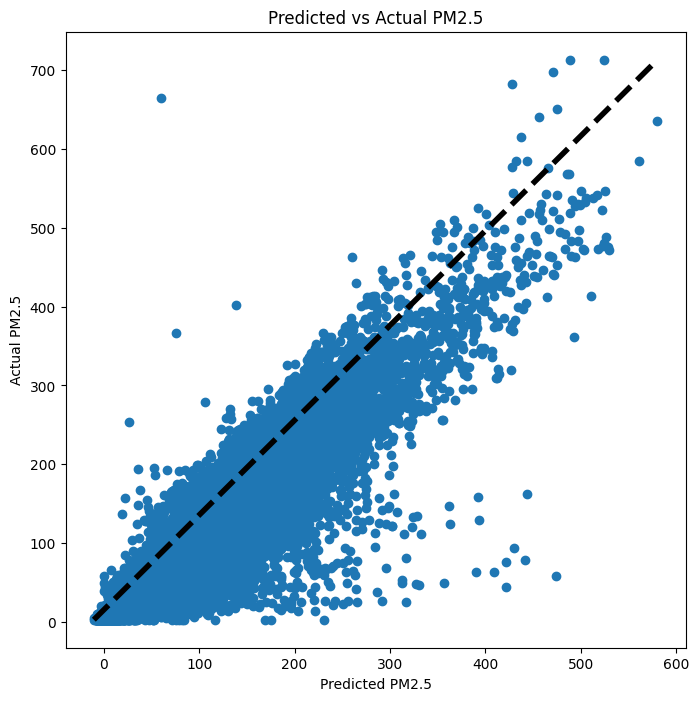

In [13]:
Air_Qualities_of_Aotizhongxin['prediction_of_PM2.5'] = results.predict(X)

x = Air_Qualities_of_Aotizhongxin['prediction_of_PM2.5']
y = Air_Qualities_of_Aotizhongxin['PM2.5']

# 创建一个新的图形
plt.figure(figsize=(8, 8))

# 绘制散点图
plt.scatter(x, y)

# 添加对角线
plt.plot([x.min(), x.max()], [y.min(), y.max()], 'k--', lw=4)

# 设置标题和标签
plt.title('Predicted vs Actual PM2.5')
plt.xlabel('Predicted PM2.5')
plt.ylabel('Actual PM2.5')

# 显示图形
plt.show()




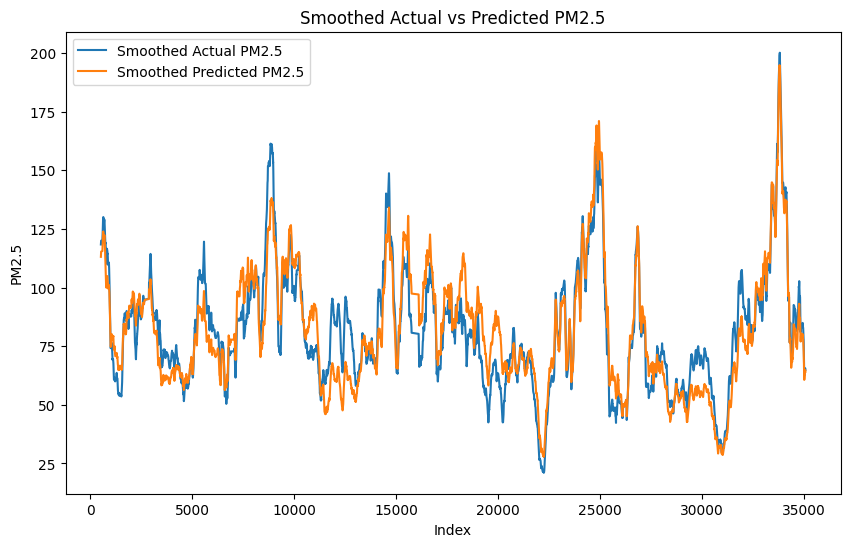

In [20]:
# 计算滑动平均
# 获取预测值
predictions = Air_Qualities_of_Aotizhongxin['prediction_of_PM2.5']

# 获取实际值
actual = Air_Qualities_of_Aotizhongxin['PM2.5']
window_size = 500  # 你可以根据需要调整这个值
predictions_smooth = predictions.rolling(window_size).mean()
actual_smooth = actual.rolling(window_size).mean()

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制平滑后的实际值的曲线
plt.plot(actual_smooth.index, actual_smooth, label='Smoothed Actual PM2.5')

# 绘制平滑后的预测值的曲线
plt.plot(predictions_smooth.index, predictions_smooth, label='Smoothed Predicted PM2.5')

# 添加图例
plt.legend()

# 设置标题和标签
plt.title('Smoothed Actual vs Predicted PM2.5')
plt.xlabel('Index')
plt.ylabel('PM2.5')

# 显示图形
plt.show()